# TD4 : Echantillonnage et quantification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercice 1

La fonction triangle est définir par : 

$$
x(t) = \begin{cases} 1 + x & \text{si} \ -1 \leq t \leq 0 \\ 1 - t & \text{si} \ 0 \leq t \leq 1 \\ 0 & \text{sinon} \end{cases}
$$

### Question 1
Calculer sa transformée de Fourier.

Par définition : 
$$
\forall f \in \mathbb{R}, X(f) = \int_{-\infty}^{+\infty}x(t)\exp(-i2\pi ft)dt
$$

En utilisant une intégration par partie :
$$
\begin{align*}
X(f) &= \int_{-1}^{0}x(t)\exp(-i2\pi ft)dt + \int_{0}^{1}x(t)\exp(-i2\pi ft)dt \\
&= \int_{-1}^{0}(1+t)\exp(-i2\pi ft)dt + \int_{0}^{1}(1-t)\exp(-i2\pi ft)dt \\
\end{align*}
$$

Intégration par partie
$$
\int uv'dx = [uv] - \int u'vdx \\
\text{avec}
\begin{cases}
u = 1+t\\
u' = 1 \\
v' = \exp(-i2\pi ft)\\
v = \frac{\exp(-i2\pi ft)}{-2i\pi f}
\end{cases}
$$
$$
\begin{align*}
\int_{-1}^0(1+t)\exp(-i2\pi ft)dt &= \left[(1+t)\frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_{-1}^0 - \int_{-1}^0 \frac{\exp(-i2\pi ft)}{-2i\pi f}dt \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\int_{-1}^0 \exp(-2i\pi ft)dt \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\left[ \frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_{-1}^0 \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{2i\pi f}\left( \frac{\exp(0)}{-2i\pi f} - \frac{\exp(i2\pi f)}{-2i\pi f} \right) \\
								  &= \frac{1}{-2i\pi f} + \frac{1}{-2^2i^2\pi^2 f^2}\left(1 - \exp(i2\pi f)\right) \\
								  &= \frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(i2\pi f)}{4\pi^2 f^2}
\end{align*}
$$

Intégration par partie
$$
\int uv'dx = [uv] - \int u'vdx \\
\text{avec}
\begin{cases}
u = 1-t\\
u' = -1 \\
v' = \exp(-i2\pi ft)\\
v = \frac{\exp(-i2\pi ft)}{-2i\pi f}
\end{cases}
$$
$$
\begin{align*}
\int_0^1(1-t)\exp(-i2\pi ft)dt &= \left[(1-t)\frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_0^1 - \int_0^1 -1*\frac{\exp(-i2\pi ft)}{-2i\pi f}dt \\
								  &= \frac{1}{2i\pi f} - \frac{1}{2i\pi f}\int_0^1 \exp(-2i\pi ft)dt \\
								  &= \frac{1}{-2i\pi f} - \frac{1}{2i\pi f}\left[ \frac{\exp(-i2\pi ft)}{-2i\pi f} \right]_0^1 \\
								  &= \frac{1}{2i\pi f} - \frac{1}{2i\pi f}\left(\frac{\exp(-i2\pi f)}{-2i\pi f}  - \frac{\exp(0)}{-2i\pi f} \right) \\
								  &= \frac{1}{2i\pi f} - \frac{1}{-2^2i^2\pi^2 f^2}\left(\exp(-i2\pi f) - 1 \right) \\
								  &= -\frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(-i2\pi f)}{4\pi^2 f^2}
\end{align*}
$$

On s'appuie sur les formules suivantes :

- Formule d'Euler : $\cos(x) = \frac{\exp^{ix}+\exp{-ix}}{2}$
- Linéarisation : $\cos(2x) = 1 - 2\sin^2(x)\Rightarrow \sin^2(x) = \frac{1-\cos(2x)}{2}$
- Sinus cardinal : $sinc(x) = \frac{\sin(x)}{x}$

On a ainsi $\forall t \neq 0 $:
$$
\begin{align*}
X(f) &= \frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(i2\pi f)}{4\pi^2 f^2} -\frac{i}{2\pi f} + \frac{1}{4\pi^2 f^2}- \frac{\exp(-i2\pi f)}{4\pi^2 f^2} \\
&= \frac{2}{4\pi^2f^2} - \frac{\exp(i2\pi f) + \exp(-i2\pi f)}{4\pi^2f^2} \\
&= \frac{2\cos(2\pi f) - 2}{-4\pi^2f^2} \\
&= \frac{\cos(2\pi f)-1}{-2\pi^2f^2}\\
&= \frac{\sin^2(\pi f)}{\pi^2f^2} \\
&= \left( \frac{\sin(\pi f)}{\pi f} \right)^2 \\
&= (sinc(\pi f))^2
\end{align*}
$$

Pour $t \neq 0$ :
$$
\begin{align*}
X(0) &= \int_{-\infty}^{+\infty} x(t)\exp(-i2\pi 0t)dt \\
&= \int_{-1}^1 x(t) dt \\
&= 1
\end{align*}
$$

Au final :
$$
X(f) = \begin{cases} (sinc(\pi f))^2, & t\neq 0 \\ 1, & t=0 \end{cases}
$$

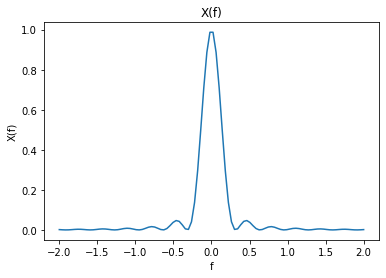

In [27]:
x = np.linspace(-2, 2, 100)
y = (np.sinc(np.pi * x))**2
plt.plot(x, y)
plt.title("X(f)")
plt.xlabel('f')
plt.ylabel('X(f)')
plt.show()

### Question 2
Quelle fréquence d’échantillonnage devrait-on choisir pour ce signal? 

In [30]:
fe = np.sqrt(10e-2)*np.pi

0.9934588265796102

### Question 3
On considère qu’une fréquence d’échantillonnage Fe est raisonnable si : 
$$
\forall f \geq F_e, \left| \frac{X(f)}{X(0}\right| \leq 10^{-2}
$$
Calculer Fe puis représenter graphiquement le signal échantillonné.
